In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df[:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Target Value Distribution

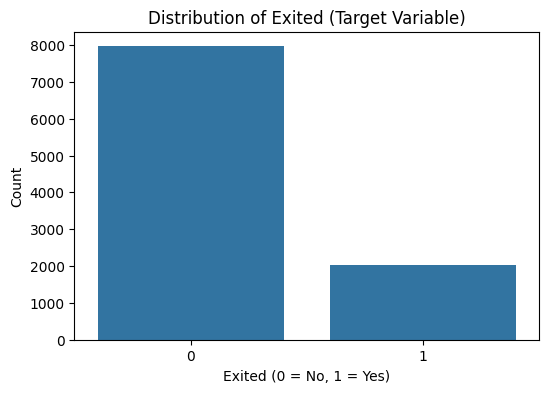

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Exited (Target Variable)')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Exited VS Age

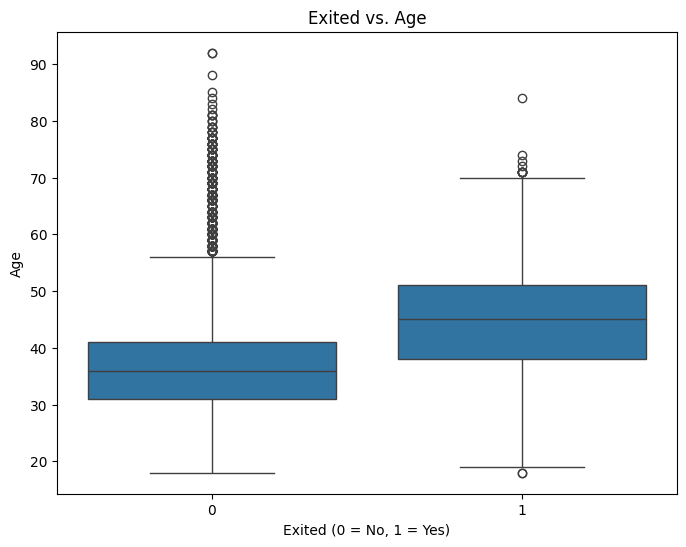

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Exited vs. Age')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

### Exited VS Balance

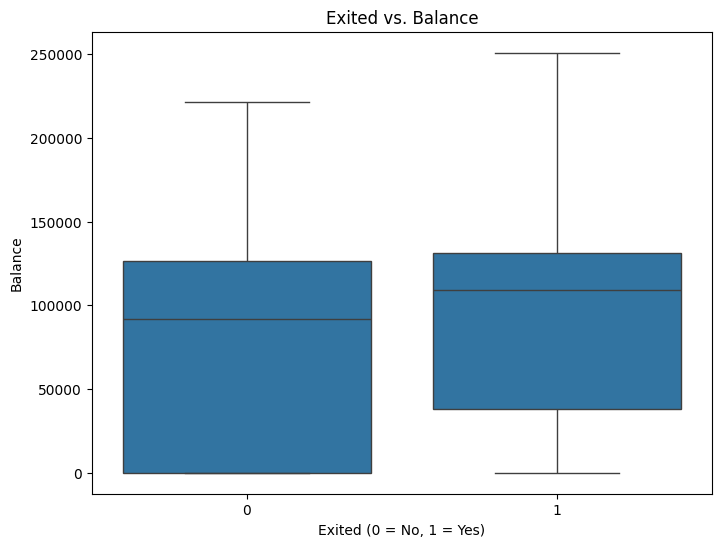

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title('Exited vs. Balance')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Balance')
plt.show()

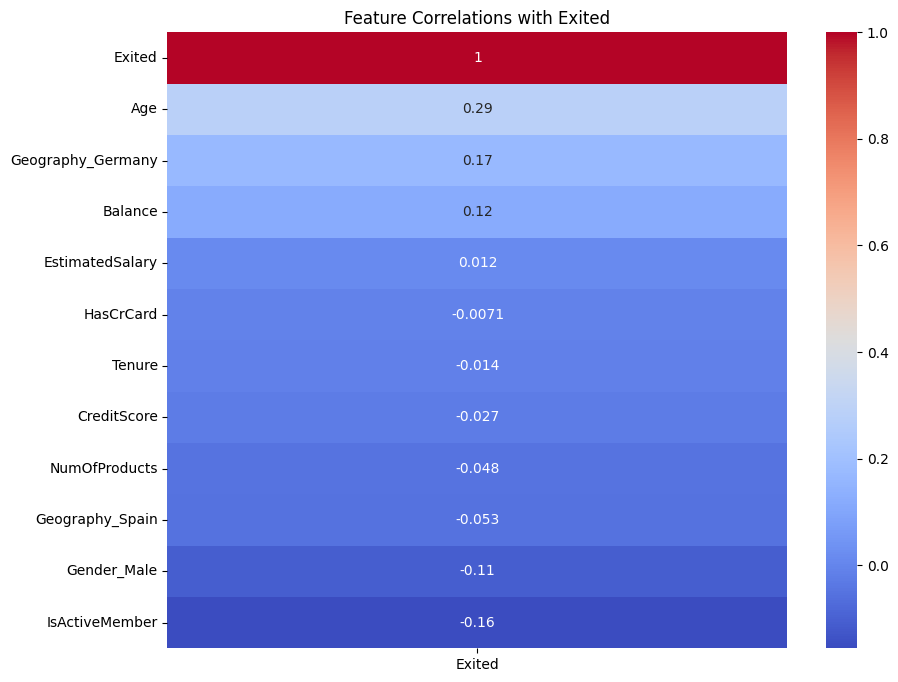

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False), annot=True, cmap='coolwarm', cbar=True)
plt.title('Feature Correlations with Exited')
plt.show()

### Process the data

In [5]:
# Dropping irrelevent columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [6]:
# For data in categorical form
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [8]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
model = RandomForestClassifier(random_state = 42)
model

RandomForestClassifier(random_state=42)

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [29]:
y_pred = best_rf_model.predict(x_test)

In [31]:
best_rf_model.score(x_test, y_test)

0.866

In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1548   59]
 [ 209  184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Accuracy Score: 0.866


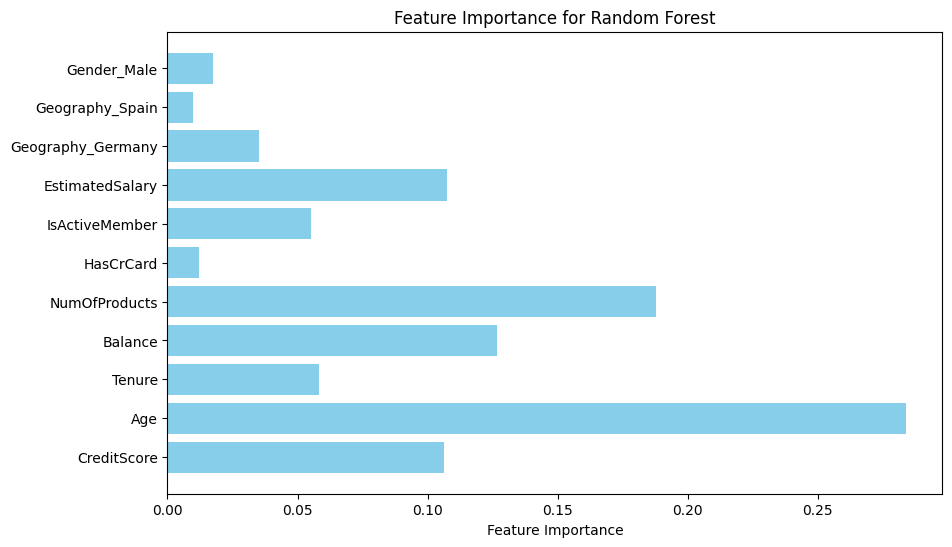

In [33]:
feature_importances = best_rf_model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")
plt.show()